In [2]:
import sklearn
from sklearn import linear_model
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [3]:
df = pd.read_csv("housing_prices.csv", header=0)
df2=df.values

X = df2[:, 1:11] #get feature data (10columns)
y = df2[:, 12] #get target data (classification 0 or 1)

X_scale = preprocessing.StandardScaler()
X = X_scale.fit_transform(X) #scale features

X_train=X[0:900, :] #About 60 percent training (900/1460)
Y_train=y[0:900]
X_test=X[900:, :] #About 40 percent testing (560/1460)
Y_test=y[900:]

In [4]:
'''X_scale = preprocessing.StandardScaler()
y = housing_y
X_train, X_test, Y_train, Y_test = train_test_split(housing, y, test_size=0.25, random_state=42)
print(
    X_train.shape,
    y_train.shape,
)'''

'X_scale = preprocessing.StandardScaler()\ny = housing_y\nX_train, X_test, Y_train, Y_test = train_test_split(housing, y, test_size=0.25, random_state=42)\nprint(\n    X_train.shape,\n    y_train.shape,\n)'

In [5]:
'''housing_log = LogisticRegression()
housing_log.fit(X_train, y_train)
prediction = housing_log.predict(X_test)
print(
    housing_log.score(X_test,y_test))
# Score returns mean accuracy on the given test data and labels'''

'housing_log = LogisticRegression()\nhousing_log.fit(X_train, y_train)\nprediction = housing_log.predict(X_test)\nprint(\n    housing_log.score(X_test,y_test))\n# Score returns mean accuracy on the given test data and labels'

In [6]:
c_vals = [0.0001, 0.001,0.01,0.1,1,10]
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Lasso Regularization

In [7]:

def logRegModel(c, X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c, penalty="l1", solver='saga')
    logreg = logreg.fit(X_train, Y_train)
    train_yhat = logreg.predict(X_train)
    acc_train = np.sum(np.where((train_yhat - Y_train) == 0, 1, 0))/Y_train.shape[0]
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    test_yhat = logreg.predict(X_test)
    acc_test = np.sum(np.where((test_yhat-Y_test)==0, 1, 0))/Y_test.shape[0]
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg.append(c)
    

Accuracy on training data = 0.832222
Accuracy on test data = 0.858929
Accuracy on training data = 0.832222
Accuracy on test data = 0.858929
Accuracy on training data = 0.843333
Accuracy on test data = 0.869643
Accuracy on training data = 0.936667
Accuracy on test data = 0.923214
Accuracy on training data = 0.936667
Accuracy on test data = 0.932143
Accuracy on training data = 0.936667
Accuracy on test data = 0.932143


/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Text(0.5, 0, 'C Value')

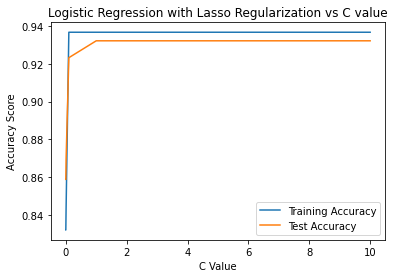

In [27]:
acc_train_logreg = [] 
acc_test_logreg = [] 
c_logreg=[]
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logRegModel(c, X_train, Y_train, X_test, Y_test)
plt.plot(c_logreg, acc_train_logreg)
plt.plot(c_logreg, acc_test_logreg)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Logistic Regression with Lasso Regularization vs C value")
plt.ylabel("Accuracy Score")
plt.xlabel("C Value")

# Ridge Regularization

In [10]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

In [11]:
def logreg_model_ridge(c , X_train, Y_train, X_test, Y_test):
    logreg_ridge = linear_model.LogisticRegression(C=c)
    logreg_ridge=logreg_ridge.fit(X_train, Y_train)
    train_yhat = logreg_ridge.predict(X_train)
    acc_train = np.sum(np.where((train_yhat-Y_train)==0, 1, 0))/Y_train.shape[0]
    acc_train_logreg_ridge.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    test_yhat = logreg_ridge.predict(X_test)
    acc_test = np.sum(np.where((test_yhat-Y_test)==0, 1, 0))/Y_test.shape[0]
    acc_test_logreg_ridge.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    c_logreg_ridge.append(c)


Accuracy on training data = 0.832222
Accuracy on test data = 0.858929
Accuracy on training data = 0.832222
Accuracy on test data = 0.858929
Accuracy on training data = 0.918889
Accuracy on test data = 0.919643
Accuracy on training data = 0.933333
Accuracy on test data = 0.926786
Accuracy on training data = 0.936667
Accuracy on test data = 0.930357
Accuracy on training data = 0.936667
Accuracy on test data = 0.932143


Text(0.5, 0, 'C Value')

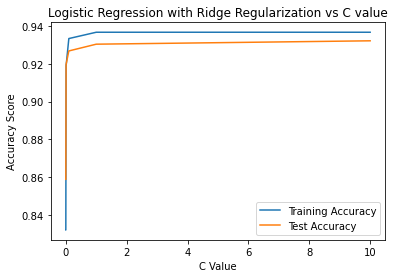

In [26]:
acc_train_logreg_ridge = [] 
acc_test_logreg_ridge = [] 
c_logreg_ridge=[]

for c in cVals:
    logreg_model_ridge(c, X_train, Y_train, X_test, Y_test)
plt.plot(c_logreg_ridge, acc_train_logreg_ridge)
plt.plot(c_logreg_ridge, acc_test_logreg_ridge)

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Logistic Regression with Ridge Regularization vs C value")
plt.ylabel("Accuracy Score")
plt.xlabel("C Value")

# Polynomial Feature Transformation

In [15]:
poly = PolynomialFeatures(2)
Xtrain_transformed = poly.fit_transform(X_train)
Xtest_transformed = poly.fit_transform(X_test)

Accuracy on training data = 0.832222
Accuracy on test data = 0.858929
Accuracy on training data = 0.832222
Accuracy on test data = 0.858929
Accuracy on training data = 0.835556
Accuracy on test data = 0.858929
Accuracy on training data = 0.834444
Accuracy on test data = 0.858929


/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Accuracy on training data = 0.835556
Accuracy on test data = 0.858929
Accuracy on training data = 0.835556
Accuracy on test data = 0.858929


Text(0.5, 0, 'C Value')

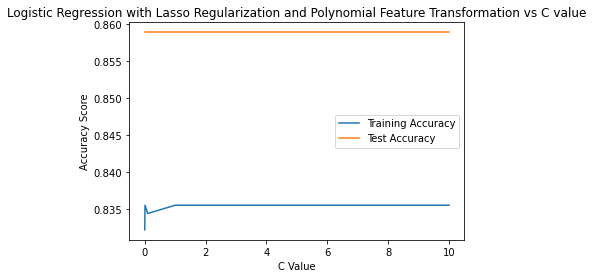

In [25]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

#test with Lasso Logreg Function
for c in cVals:
    logRegModel(c, Xtrain_transformed, Y_train, Xtest_transformed, Y_test)
    
plt.plot(c_logreg, acc_train_logreg)
plt.plot(c_logreg, acc_test_logreg)
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Logistic Regression with Lasso Regularization and Polynomial Feature Transformation vs C value")
plt.ylabel("Accuracy Score")
plt.xlabel("C Value")

Accuracy on training data = 0.832222
Accuracy on test data = 0.857143
Accuracy on training data = 0.873333
Accuracy on test data = 0.873214
Accuracy on training data = 0.934444
Accuracy on test data = 0.925000
Accuracy on training data = 0.946667
Accuracy on test data = 0.921429
Accuracy on training data = 0.953333
Accuracy on test data = 0.925000
Accuracy on training data = 0.957778
Accuracy on test data = 0.928571


/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vidyagopal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Text(0.5, 0, 'C Value')

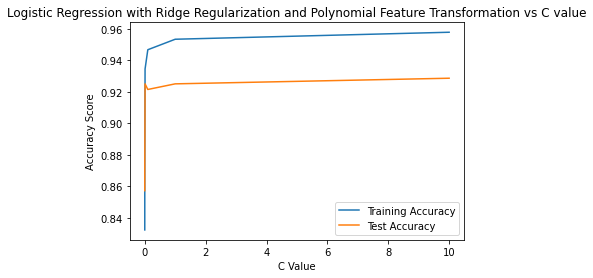

In [24]:
acc_train_logreg_ridge = []
acc_test_logreg_ridge = []
c_logreg_ridge = []

#Call the function for ridge model
for c in cVals:
    logreg_model_ridge(c, Xtrain_transformed, Y_train, Xtest_transformed, Y_test)
    
#plot training and testing accuracy
plt.plot(c_logreg_ridge, acc_train_logreg_ridge)
plt.plot(c_logreg_ridge, acc_test_logreg_ridge)
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.title("Logistic Regression with Ridge Regularization and Polynomial Feature Transformation vs C value")
plt.ylabel("Accuracy Score")
plt.xlabel("C Value")

In [17]:
#training/testing accuracy

In [ ]:
#training high, testing low = overfit
#currently low bias, high variance
#because of the high accuracy within the data points, we believe that the best model for our dataset is the Tanh Activation Function.